> <h3> 회귀분석 Boston 집값 구하기 </h3>

In [106]:
from sklearn import datasets
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

df, price = datasets.fetch_openml('boston', return_X_y = True)

df['PRICE']= price

In [108]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [110]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  PRICE    506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.6 KB


In [112]:
df.shape

(506, 14)

In [114]:
df.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


In [116]:
df['RAD'] = df['RAD'].astype(int)

In [118]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

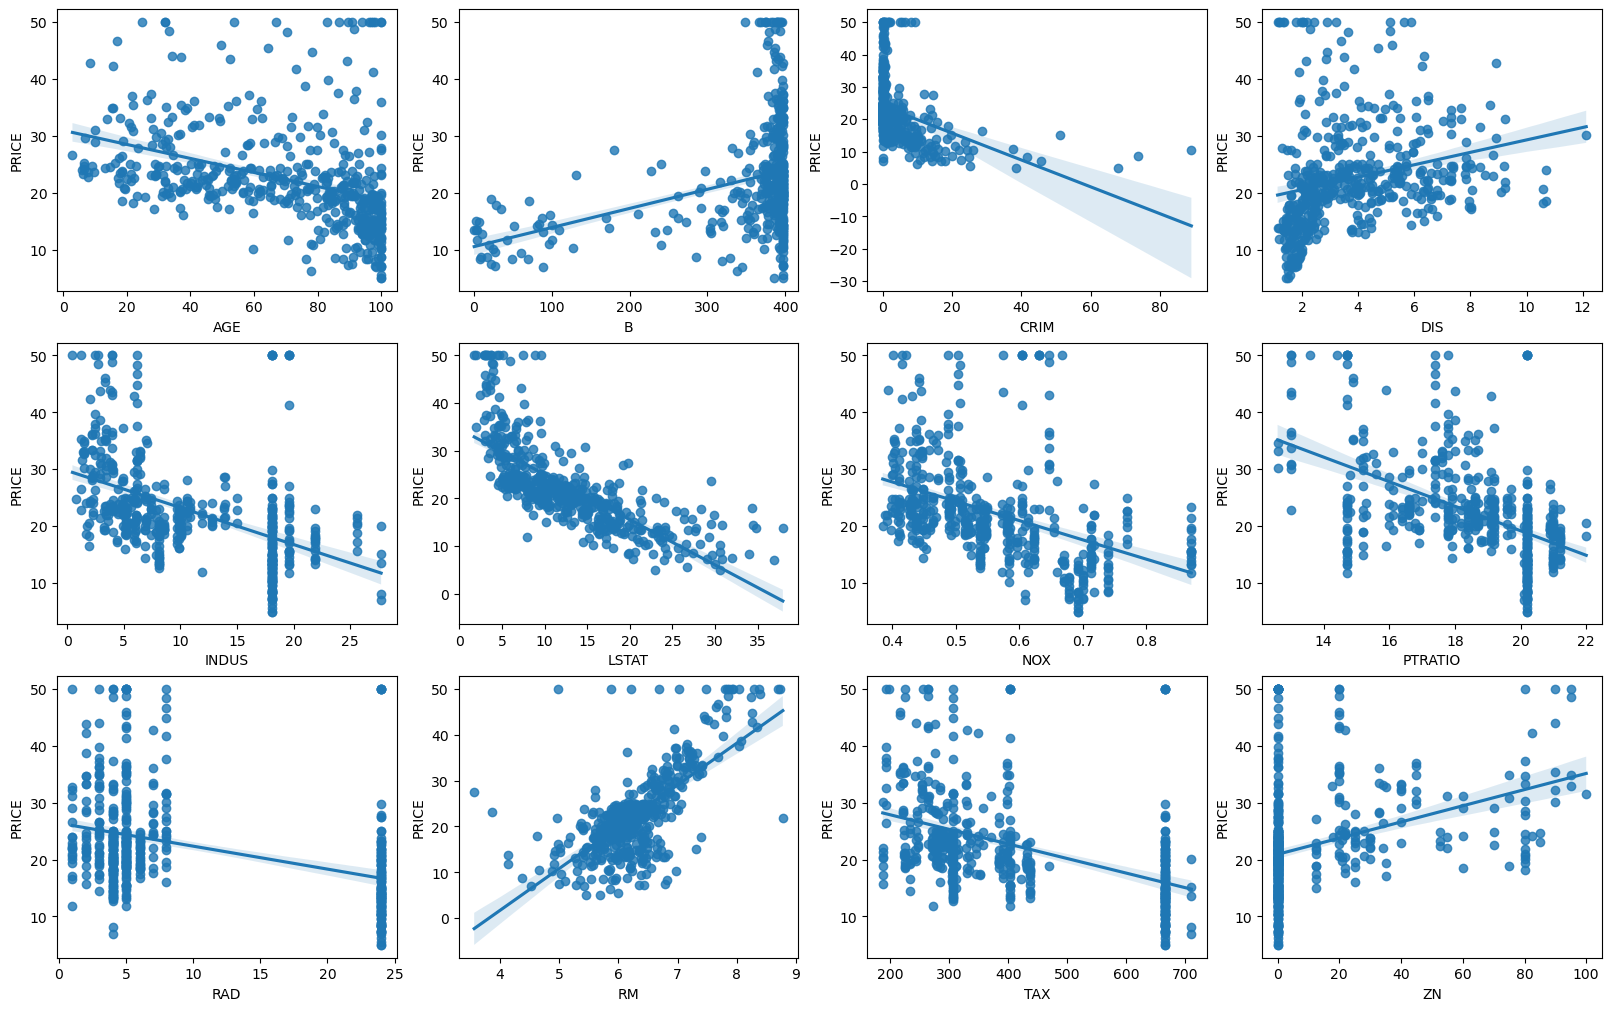

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(figsize=(16,10), ncols = 4, nrows = 3, constrained_layout = True)

features = df.columns.difference(['PRICE', 'CHAS'])

for i, features in zip(range(12), features):
    row = int(i/4)
    col = i%4
    sns.regplot(x=features, y=df['PRICE'], data=df, ax=axs[row][col])

In [121]:
from sklearn.model_selection import train_test_split

x = df[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']].values
y = df['PRICE'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=222)

In [124]:
print(y_train.mean(), y_test.mean())

22.723762376237623 21.77647058823529


In [126]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)

In [128]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x_train_scaled, y_train)

LinearRegression()

In [130]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

pred_train = linear.predict(x_train_scaled)

mae = mean_absolute_error(y_train, pred_train)
mse = mean_squared_error(y_train, pred_train)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, pred_train)

print('MAE : {0: .5f}'.format(mae))
print('MSE : {0: .5f}'.format(mse))
print('RMSE : {0: .5f}'.format(rmse))
print('R2 : {0: .5f}'.format(r2))

MAE :  3.19312
MSE :  20.79697
RMSE :  4.56037
R2 :  0.74937


In [132]:
x_test_scaled = scaler.fit_transform(x_test)
pred = linear.predict(x_test_scaled)

In [134]:
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)

print('MAE : {0: .5f}'.format(mae))
print('MSE : {0: .5f}'.format(mse))
print('RMSE : {0: .5f}'.format(rmse))
print('R2 : {0: .5f}'.format(r2))

MAE :  4.67972
MSE :  40.86776
RMSE :  6.39279
R2 :  0.54294


In [136]:
pred_df = pd.DataFrame(pred, columns = ['pred PRICE'])
pred_df.head()

,pred PRICE
0,20.917357
1,25.848669
2,33.246446
3,16.446155
4,24.714984


In [138]:
actual = pd.DataFrame(y_test, columns=['acutal PRICE'])
actual.head()

,acutal PRICE
0,23.3
1,23.7
2,35.4
3,19.5
4,22.3


In [140]:
reg_result = pd.concat([actual, pred_df], axis=1)
reg_result.head(15)

,acutal PRICE,pred PRICE
0,23.3,20.917357
1,23.7,25.848669
2,35.4,33.246446
3,19.5,16.446155
4,22.3,24.714984
5,13.3,17.435084
6,9.5,8.906088
7,20.6,17.440428
8,14.4,-2.311585
9,18.6,12.210176


> <h3> 분류분석 IRIS 종류 맞추기 </h3>

In [142]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
iris_dt = iris.data
iris_label = iris.target

df = pd.DataFrame(data = iris_dt, columns = iris.feature_names)
df['Species'] = iris_label

In [144]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [146]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [148]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [152]:
df['Species'].unique()

array([0, 1, 2])

In [154]:
df.shape

(150, 5)

In [175]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(iris_dt, iris_label, test_size=0.2, random_state=222, stratify=iris_label)

In [177]:
print(f"x_train length: {len(x_train)}")
print(f"y_train length: {len(y_train)}")

x_train length: 120
y_train length: 120


In [179]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

In [181]:
from sklearn.tree import DecisionTreeClassifier

dtree_clf_5 = DecisionTreeClassifier(max_depth = 5, random_state=100)
dtree_clf_3 = DecisionTreeClassifier(max_depth = 3, random_state=100)
dtree_clf_1 = DecisionTreeClassifier(max_depth = 1, random_state=100)


In [205]:
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(dtree_clf_5, x_train, y_train, scoring='accuracy', cv=10)

print('교차검증 정확도: ', np.round(scores, 3), 
      '평균 검증 정확도: ', np.round(np.mean(scores), 4))

교차검증 정확도:  [1.    1.    0.917 0.917 0.917 1.    0.917 1.    0.917 0.75 ] 평균 검증 정확도:  0.9333


In [195]:
scores = cross_val_score(dtree_clf_3, x_train, y_train, scoring='accuracy', cv=10)

print('교차검증 정확도: ', np.round(scores, 3), 
      '평균 검증 정확도: ', np.round(np.mean(scores), 4))

교차검증 정확도:  [1.    1.    0.917 0.917 0.917 1.    0.917 1.    0.917 0.833] 평균 검증 정확도:  0.9417


In [197]:
scores = cross_val_score(dtree_clf_1, x_train, y_train, scoring='accuracy', cv=10)

print('교차검증 정확도: ', np.round(scores, 3), 
      '평균 검증 정확도: ', np.round(np.mean(scores), 4))

교차검증 정확도:  [0.667 0.667 0.667 0.667 0.667 0.667 0.667 0.667 0.667 0.667] 평균 검증 정확도:  0.6667


In [207]:
dtree_clf_5.fit(x_train, y_train)
pred = dtree_clf_5.predict(x_test)

from sklearn.metrics import accuracy_score
print('의사결정나무의 교차검증 후 예측정확도: {0: .5f}'.format(accuracy_score(y_test, pred)))

의사결정나무의 교차검증 후 예측정확도:  0.96667


In [209]:
dtree_clf_3.fit(x_train, y_train)
pred = dtree_clf_3.predict(x_test)

from sklearn.metrics import accuracy_score
print('의사결정나무의 교차검증 후 예측정확도: {0: .5f}'.format(accuracy_score(y_test, pred)))

의사결정나무의 교차검증 후 예측정확도:  0.90000


In [211]:
pred = pd.DataFrame(pred, columns = ['pred Species'])
pred.head()

,pred Species
0,0
1,1
2,2
3,1
4,2


In [215]:
actual = pd.DataFrame(y_test, columns=['actual Species'])
actual.head()

,actual Species
0,0
1,1
2,2
3,2
4,2


In [217]:
classify_result = pd.concat([actual, pred], axis=1)
classify_result.head(10)

,actual Species,pred Species
0,0,0
1,1,1
2,2,2
3,2,1
4,2,2
5,0,0
6,0,0
7,1,2
8,2,2
9,1,1
